# Tutorials

This tutorial aims to get users familiar with different functions for **GameArg**

### Import Package

In [1]:
from GameArg import *
from IPython.display import display, Image

## Graph Input

**Start from Win_Move Graph**

the following graph has to be a **win_move** graph, if you input a argumentation graph, please source node and target node first

In [2]:
%%file files/plain_wm_graph.dlv
edge(a,c).
edge(k,l).
edge(c,d).
edge(c,e).
edge(l,e).
edge(l,m).
edge(d,e).
edge(e,d).
edge(e,m).
edge(m,e).
edge(d,f).
edge(d,g).
edge(g,d).
edge(e,h).
edge(m,n).
edge(n,m).

Overwriting files/plain_wm_graph.dlv


**Start from Attack Graph**

if you have the **attack graph** like below, you can run the following to generate the plain_wm_graph.dlv

In [3]:
%%file files/plain_atk_graph.dlv
edge(c,a).
edge(l,k).
edge(d,c).
edge(e,c).
edge(e,l).
edge(m,l).
edge(e,d).
edge(d,e).
edge(m,e).
edge(e,m).
edge(f,d).
edge(g,d).
edge(d,g).
edge(h,e).
edge(n,m).
edge(m,n).

Overwriting files/plain_atk_graph.dlv


In [4]:
input_file_path = "files/plain_atk_graph.dlv"
output_file_path = "files/plain_wm_graph.dlv"
reverse_edges(input_file_path, output_file_path)

## Graph Generation

**Win-Move Graph**

In [5]:
create_plain_graph("files/plain_wm_graph.dlv", "edge", "graphs/wm_graph.dot")

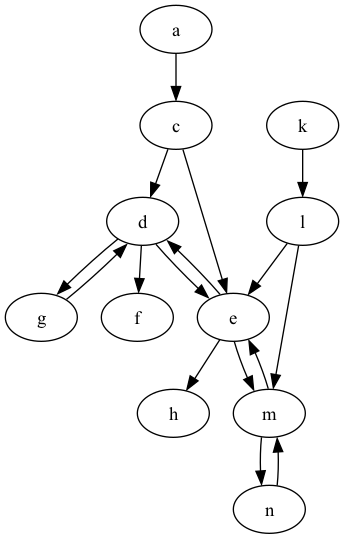

In [6]:
render_dot_to_png("graphs/wm_graph.dot", "graphs/wm_graph.png")
Image("graphs/wm_graph.png")

**Attack_Graph**

In [7]:
create_plain_graph(
    "files/plain_wm_graph.dlv", "edge", "graphs/attack_graph.dot", arg=True
)

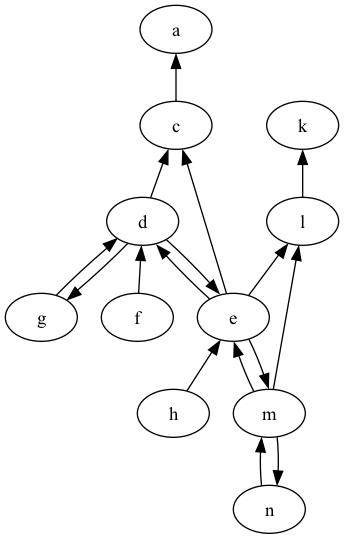

In [8]:
render_dot_to_png("graphs/attack_graph.dot", "graphs/attack_graph.png")
Image("graphs/attack_graph.png")

## Graph Coloring : Well-Founded Semantics

Here we will use the kernel as an example to help you better understand the tool

### Step by Step

#### Get Node Status

Because `e(X,Y) :- edge(X,Y).`, the graph for kernel calculation will be the same as the plain win-move graph we have drawn previously.

In [9]:
%%file files/plain_to_kernel.dlv

e(X,Y):- edge(Y,X).

Overwriting files/plain_to_kernel.dlv


Based on Combinatorial Game Theory Foundations Applied to Digraph Kernels by Dr.Fraenkel, we know that Kernel is both indepedent and dominating, which can be defined as

In [10]:
%%file files/cal_kernel.dlv

% c represents complements of kernels
% k stands for kernel
% pk means possibly in or out of kernel

% Positions
pos(X) :- e(X,_).
pos(X) :- e(_,X).

% Kernel rules
c(X) :- e(Y,X), k(Y).         % X is in the kernel complement if there is an edge from X into the kernel (to Y)
k(X) :- pos(X), not c(X).
pk(X) :- pos(X), not c(X), not k(X).

Overwriting files/cal_kernel.dlv


`-wf` indicates that the dlv will use well-founded semantics

In [11]:
cmd_solve = 'dlv files/plain_wm_graph.dlv files/plain_to_kernel.dlv files/cal_kernel.dlv -wf'

let's run it with DLV, we will get the following output

In [12]:
run_command(cmd_solve)

'DLV [build BEN/Dec 17 2012   gcc 4.2.1 (Apple Inc. build 5666) (dot 3)]\n\nTrue: {edge(a,c), edge(c,d), edge(c,e), edge(k,l), edge(l,e), edge(l,m), edge(d,e), edge(d,f), edge(d,g), edge(e,d), edge(e,m), edge(e,h), edge(m,e), edge(m,n), edge(g,d), edge(n,m), e(c,a), e(l,k), e(d,c), e(d,e), e(d,g), e(e,c), e(e,l), e(e,d), e(e,m), e(m,l), e(m,e), e(m,n), e(f,d), e(g,d), e(h,e), e(n,m), pos(a), pos(c), pos(k), pos(l), pos(d), pos(e), pos(m), pos(f), pos(g), pos(h), pos(n), c(a), k(c), c(d), c(e), k(f), k(g), k(h)}\nUndefined: {c(k), k(k), c(l), k(l), c(m), k(m), c(n), k(n), pk(k), pk(l), pk(m), pk(n)}\n'

however, we need to filterout unnecessary information

In [13]:
kernel_nodes_status = get_nodes_status(run_command(cmd_solve),node_types=["c","k","pk"])

thus we know the status of each nodes, which we will use for further coloring the graph

In [14]:
kernel_nodes_status

{'c': ['a', 'd', 'e'], 'k': ['c', 'f', 'g', 'h'], 'pk': ['k', 'l', 'm', 'n']}

#### Visualization Schema

In [15]:
kernel_node_color_wfs = { 'c': 'white','k': 'black', 'pk': 'gray'}
kernel_edge_color_wfs = {
        ('white', 'white'): 'gray',
        ('white', 'gray'): 'gray',
        ('gray', 'white'): 'gray',
        ('gray', 'gray'): 'dark_yellow',
        ('white', 'black'): 'dark_gray',
        ('black', 'white'): 'black'
    }

In [16]:
apply_color_schema("graphs/wm_graph.dot", "kernel", kernel_nodes_status, kernel_node_color_wfs, kernel_edge_color_wfs)

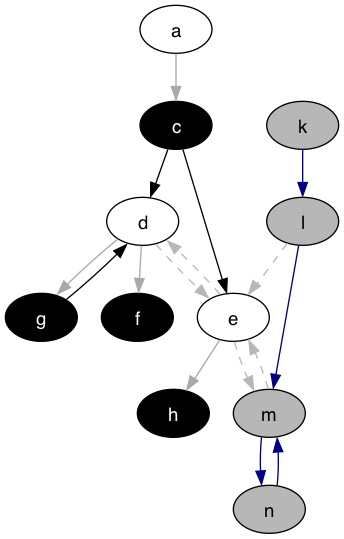

In [17]:
Image("graphs/kernel_graph_colored.png")

### One Function for All

As we have win_move graph and attack graph, we start to think about maybe we only need to provide the visualization schema and one function can provide us the expected graph

**WM game**

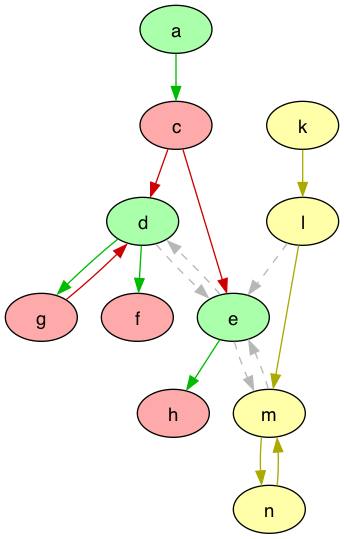

In [18]:
game_node_color_wfs = {'win': 'green','lost': 'red',  'drawn': 'yellow'}
game_edge_color_wfs = {
        ('green', 'green'): 'gray',
        ('green', 'yellow'): 'gray',
        ('yellow', 'green'): 'gray',
        ('yellow', 'yellow'): 'yellow',
        ('green', 'red'): 'green',
        ('red', 'green'): 'red'
    }
visualize_wfs("files/plain_wm_graph.dlv", "game",game_node_color_wfs, game_edge_color_wfs)
Image('graphs/game_graph_colored.png')

**Argumentation**

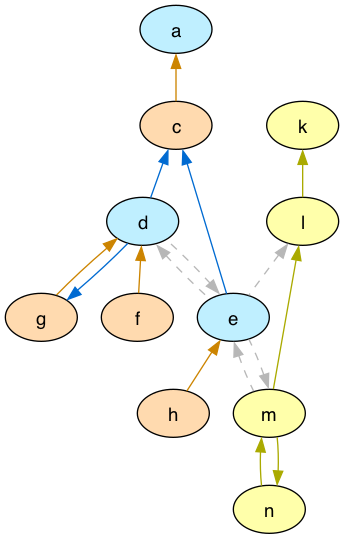

In [19]:
arg_node_color_wfs = {'defeated': 'orange','accepted': 'blue', 'undefined': 'yellow'}
arg_edge_color_wfs = {
        ('blue', 'blue'): 'gray',
        ('blue', 'yellow'): 'gray',
        ('yellow', 'blue'): 'gray',
        ('yellow', 'yellow'): 'yellow',
        ('blue', 'orange'): 'blue',
        ('orange', 'blue'): 'orange'
    }
visualize_wfs("files/plain_wm_graph.dlv","arg",arg_node_color_wfs, arg_edge_color_wfs,arg=True)
Image('graphs/arg_graph_colored.png')

### Graph Coloring: Stable Models

#### Get Node Status

similar to the WFS, but we need to remove the solve part `-wf`

In [20]:
cmd_solve = 'dlv files/plain_wm_graph.dlv files/plain_to_kernel.dlv files/cal_kernel.dlv -filter="k"'

let's run the command

In [21]:
print(run_command(cmd_solve))

DLV [build BEN/Dec 17 2012   gcc 4.2.1 (Apple Inc. build 5666) (dot 3)]

{k(c), k(k), k(m), k(f), k(g), k(h)}

{k(c), k(l), k(f), k(g), k(h), k(n)}



After the command, we can get the possible worlds

#### One Function for All

Similar to the WFS, we also want to generate all the stable models with defined visualization schema

**Stable Models for Kernel Graph**

In [22]:
kernel_node_color_stb = {'c': 'white','k': 'black'}
kernel_edge_color_stb = {
        ('white', 'white'): 'gray',
        ('white', 'gray'): 'gray',
        ('gray', 'white'): 'gray',
        ('gray', 'gray'): 'dark_yellow',
        ('white', 'black'): 'dark_gray',
        ('black', 'white'): 'black'
    }
visualize_stb("files/plain_wm_graph.dlv","kernel",kernel_node_color_stb, kernel_edge_color_stb)

**Stable Models for WM Graph**

In [23]:
game_node_color_stb = {'win': 'green','lost': 'red'}
game_edge_color_stb = {
        ('green', 'green'): 'gray',
        ('green', 'yellow'): 'gray',
        ('yellow', 'green'): 'gray',
        ('yellow', 'yellow'): 'yellow',
        ('green', 'red'): 'green',
        ('red', 'green'): 'red'
    }
visualize_stb("files/plain_wm_graph.dlv", "game",game_node_color_stb, game_edge_color_stb)

**Stable Models for Attack Graph**

In [24]:
arg_node_color_stb = {'accepted': 'blue','defeated': 'orange'}
arg_edge_color_stb = {
        ('blue', 'blue'): 'gray',
        ('blue', 'yellow'): 'gray',
        ('yellow', 'blue'): 'gray',
        ('yellow', 'yellow'): 'yellow',
        ('blue', 'orange'): 'blue',
        ('orange', 'blue'): 'orange'
    }
visualize_stb("files/plain_wm_graph.dlv","arg",arg_node_color_stb, arg_edge_color_stb,arg=True)